In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from word2number import w2n
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


## K_Means >>>> identify clusters

In [2]:
df = pd.read_excel(r'D:\PYTHON Practice Projecs\K_means Algorithm.xlsx')

In [3]:
df.head()

,Name,Age,Income($),Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Rob,27,70000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Michael,29,90000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mohan,29,61000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ismail,28,60000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Kory,42,150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['Name', 'Age', 'Income($)', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11'],
      dtype='object')

In [5]:
df.drop(['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11'], axis= 1 , inplace=True)

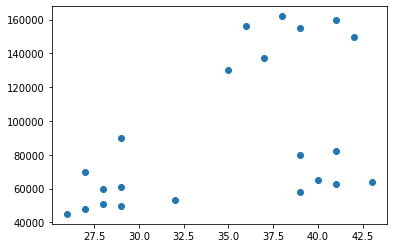

In [6]:
plt.scatter(df['Age'],df['Income($)'])

In [7]:
### USE Scaling before K_Means
scaler = MinMaxScaler() 

df['Income($)'] = scaler.fit_transform(df[['Income($)']])

df['Age'] = scaler.fit_transform(df[['Age']])

In [8]:
## START

km  = KMeans(n_clusters=3)

In [9]:
df['cluster'] = km.fit_predict(df[['Age','Income($)']])


In [10]:
df['cluster'].unique()

array([1, 0, 2])

In [15]:
### For larger Date and more features USE ELBOW METHOD
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters= k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)





D:\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


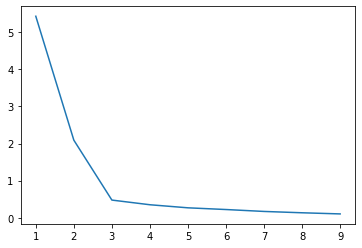

In [17]:
plt.plot(k_range, sse)

## Now we know there are 3 centroids

In [11]:
## Cluster Centers
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

<function matplotlib.pyplot.legend(*args, **kwargs)>

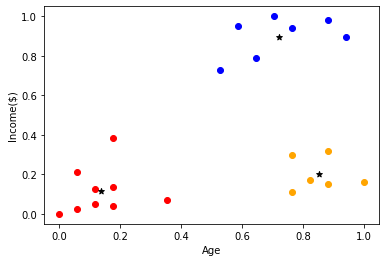

In [13]:
df1 = df[df['cluster'] ==0]
df2 = df[df['cluster'] ==1]
df3 = df[df['cluster'] ==2]

plt.scatter(df1['Age'], df1['Income($)'],color = 'blue')
plt.scatter(df2['Age'], df2['Income($)'],color = 'Red')
plt.scatter(df3['Age'], df3['Income($)'],color = 'Orange')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'black', marker= '*', label = 'centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend

## clusters are not proper due to scaling of x & y axis
## Use MinMaxscaler

In [16]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2664030124668416,
 0.22020960864009395,
 0.1685851223602976,
 0.13265419827245162,
 0.10188787724979426]

In [23]:
from sklearn import datasets

iris = datasets.load_iris()
df4=pd.DataFrame(iris.data)


In [25]:
df4.columns=['sepal_len', 'sepal_wid','petal_len', 'petal_wid']

In [27]:
df4.drop(['petal_len','petal_wid'], axis = 1,inplace=True)

In [28]:
df4.head()

,sepal_len,sepal_wid
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


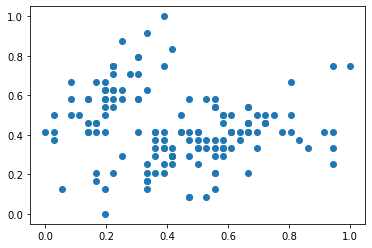

In [171]:
plt.scatter(df4['sepal_len'],df4['sepal_wid'])

In [29]:
## Scaling
df4['sepal_len'] = scaler.fit_transform(df4[['sepal_len']])
df4['sepal_wid'] = scaler.fit_transform(df4[['sepal_wid']])


D:\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


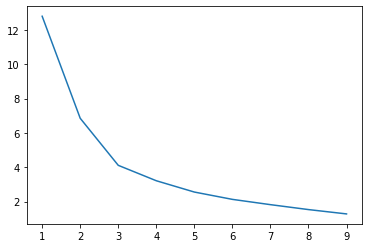

In [73]:
## Elbow Method
k_rge = range(1,10)
sse2 =[]

for k in k_rge:
    km2 = KMeans(n_clusters=k)
    km2.fit(df4[['sepal_len', 'sepal_wid']])
    sse2.append(km2.inertia_)

plt.plot(k_rge, sse2)


In [66]:
sse2

[12.797757201646087,
 6.85529052603328,
 4.115194202754064,
 3.217483856523378,
 2.55908638421093,
 2.1038102857284446,
 1.8337431669136393,
 1.5481997384216029,
 1.2749738981116145]

In [88]:
df4

,sepal_len,sepal_wid,Cluster
0,0.222222,0.625000,0
1,0.166667,0.416667,0
2,0.111111,0.500000,0
3,0.083333,0.458333,0
4,0.194444,0.666667,0
...,...,...,...
145,0.666667,0.416667,1
146,0.555556,0.208333,2
147,0.611111,0.416667,1
148,0.527778,0.583333,1


In [74]:
km2 = KMeans(n_clusters=3)

df4['Cluster'] = km2.fit_predict(df4[['sepal_len', 'sepal_wid']])

In [91]:
km2.cluster_centers_

array([[0.19897959, 0.60459184],
       [0.69562648, 0.45390071],
       [0.40483539, 0.28009259]])

<function matplotlib.pyplot.legend(*args, **kwargs)>

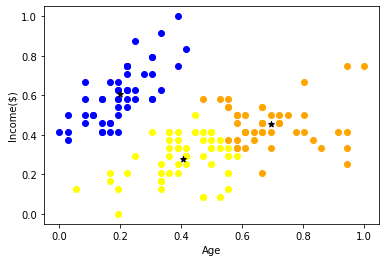

In [96]:
df5 = df4[df4['Cluster'] ==0]
df6 = df4[df4['Cluster'] ==1]
df7 = df4[df4['Cluster'] ==2]

plt.scatter(df5['sepal_len'], df5['sepal_wid'],color = 'blue')
plt.scatter(df6['sepal_len'],df6['sepal_wid'],color = 'orange')
plt.scatter(df7['sepal_len'],df7['sepal_wid'],color = 'Yellow')

plt.scatter(km2.cluster_centers_[:,0],km2.cluster_centers_[:,1],color = 'black', marker= '*', label = 'centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend



In [97]:
df4['Cluster'].unique()

array([0, 2, 1])

In [98]:
df4.dtypes

sepal_len    float64
sepal_wid    float64
Cluster        int32
dtype: object